<a href="https://colab.research.google.com/github/MarcosMurguel/ICRedesNeurais-MorfologiaMatematica/blob/main/Projeto_de_Pesquisa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification, make_moons, load_breast_cancer
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras import Model, Input, Sequential
from tensorflow.keras.layers import Dense, Layer
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from re import VERBOSE

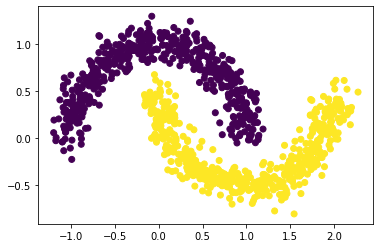

In [ ]:
X, Y = make_moons(n_samples=1000, noise=0.1)
plt.scatter(X[:,0],X[:,1],c=Y) #c de color, no caso nossa cor vem de y

In [ ]:
Xc, Yc = load_breast_cancer(return_X_y=True)

In [ ]:
class DilationLayer(Layer):
    def __init__(self, neuronios=1):
        super(DilationLayer, self).__init__()
        self.units = neuronios

    def build(self, input_shape):
            w_init = tf.random_uniform_initializer(minval=-1, maxval=1)
            self.w = tf.Variable(initial_value=w_init(shape=(self.units, input_shape[-1])),trainable=True)

    def call(self, inputs):
        return tf.stack([tf.reduce_max(tf.add(inputs,self.w[i]),axis=1) for i in range(self.units)], axis=1)

In [ ]:
class ErosionLayer(Layer):
    def __init__(self, neuronios=1):
        super(ErosionLayer, self).__init__()
        self.units = neuronios

    def build(self, input_shape): 
            w_init = tf.random_uniform_initializer(minval=-1, maxval=1)
            self.w = tf.Variable(initial_value=w_init(shape=(self.units, input_shape[-1])),trainable=True)

    def call(self, inputs):  
        return tf.stack([tf.reduce_min(tf.add(inputs,self.w[i]),axis=1) for i in range(self.units)], axis=1)

In [ ]:
class MorphNet():
    def __init__(self, Neuronios = 10): 
        self.N = Neuronios 
  
    def fit(self,X,Y,epochs = 100):
        self.clf = Sequential([ErosionLayer(self.N),Dense(1)]) 
        self.clf.compile(optimizer="Adam",loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)) #from_logits=True está informando que não temos func de ativ na camada de saida
        self.clf.fit(X,Y,epochs=epochs) 

    def predict(self,X):
        return self.clf.predict(X) >= 0

In [ ]:
class MorphNete():
    def __init__(self, Neuronios = 10): 
        self.N = Neuronios 
  
    def fit(self,X,Y,epochs = 100):
        self.clf = Sequential([ErosionLayer(self.N),DilationLayer(self.N),Dense(1)]) 
        self.clf.compile(optimizer="Adam",loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)) #from_logits=True está informando que não temos func de ativ na camada de saida
        self.clf.fit(X,Y,epochs=epochs) 

    def predict(self,X):
        return self.clf.predict(X) >= 0

In [ ]:
def myscore(clf,X,y):
  return accuracy_score(y,clf.predict(X))

In [ ]:
clf = MorphNet(10)

In [ ]:
clf = MorphNet()
clf.fit(X,Y,1000)
Ypred = clf.predict(X)

Epoch 1/1000
32/32 [==============================] - 10s 9ms/step - loss: 1.0825
Epoch 2/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.9903
Epoch 3/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.9074
Epoch 4/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.8337
Epoch 5/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.7683
Epoch 6/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.7089
Epoch 7/1000
32/32 [==============================] - 0s 9ms/step - loss: 0.6552
Epoch 8/1000
32/32 [==============================] - 0s 9ms/step - loss: 0.6075
Epoch 9/1000
32/32 [==============================] - 0s 10ms/step - loss: 0.5650
Epoch 10/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.5277
Epoch 11/1000
32/32 [==============================] - 0s 9ms/step - loss: 0.4964
Epoch 12/1000
32/32 [==============================] - 0s 9ms/step - loss: 0.4686
Epoch 13/1000
32/32 [==

In [ ]:
clf.predict(X)

32/32 [==============================] - 0s 2ms/step


array([[ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [

In [ ]:
print(classification_report(Y,clf.predict(X)))

32/32 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       500
           1       0.90      0.87      0.88       500

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



12960/12960 [==============================] - 24s 2ms/step


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


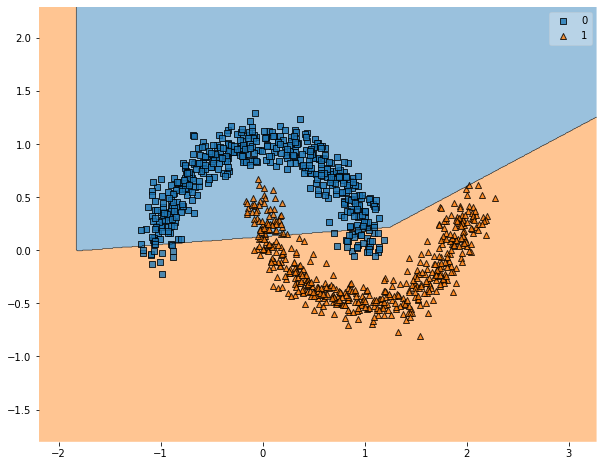

In [ ]:
plt.figure(figsize=(10,8))
plot_decision_regions(X,Y,clf = clf)

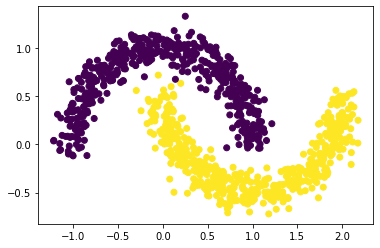

In [ ]:
X, Y = make_moons(n_samples=1000, noise=0.1)
plt.scatter(X[:,0],X[:,1],c=Y)

Epoch 1/1000
32/32 [==============================] - 2s 5ms/step - loss: 0.7475
Epoch 2/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.6747
Epoch 3/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.6138
Epoch 4/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.5632
Epoch 5/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.5205
Epoch 6/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.4848
Epoch 7/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.4555
Epoch 8/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.4308
Epoch 9/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.4104
Epoch 10/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.3933
Epoch 11/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.3788
Epoch 12/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.3665
Epoch 13/1000
32/32 [====

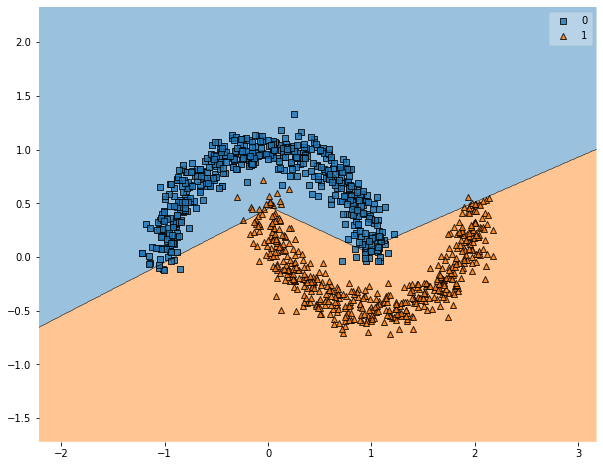

In [ ]:
clf = MorphNet()
clf.fit(X,Y,1000)
Ypred = clf.predict(X)

plt.figure(figsize=(10,8))
plot_decision_regions(X,Y,clf = clf)

print(classification_report(Y,clf.predict(X)))

In [ ]:
kf = StratifiedKFold(n_splits=5) 
for ind_tr, ind_te in kf.split(range(X.shape[0]), Y):
  Xtr = X[ind_tr,:]
  Ytr = Y[ind_tr]
  Xte = X[ind_te,:]
  Yte = Y[ind_te]
  clf = MorphNet(10)
  clf.fit(Xtr,Ytr,1000)
  print(accuracy_score(Yte,clf.predict(Xte)))

A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch 504/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.1497
Epoch 505/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.1495
Epoch 506/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.1493
Epoch 507/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.1493
Epoch 508/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.1491
Epoch 509/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.1491
Epoch 510/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.1489
Epoch 511/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.1491
Epoch 512/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1488
Epoch 513/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.1485
Epoch 514/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.1484
Epoch 515/1000
25/25 [======